# LAB 03
## Regression Project

Description: The dataset is of insurance in which charges is dependent and others are independent variables.Insurance dataset contains information about individuals such as age, sex, BMI, number of children, smoking status, region, and insurance charges.

# DATA PREPROCESSING

# 1. Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt  

# 2. Load dataset and Showing Dataset Dimesnsion

In [7]:
df = pd.read_csv('insurance.csv')  
df.shape

(1338, 7)

# 3. Explore the data

In [9]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
890,64,female,26.885,0,yes,northwest,29330.98315


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Checking Information and Datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Checking Null Values

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 4. Identifying Numerical and Categorical Columns
## Checking Outliers

In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns  
mask = pd.Series(True, index=df.index)  

for col in num_cols: 
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    mask = mask & df[col].between(lower_bound, upper_bound)  

data_cleaned = df[mask]  

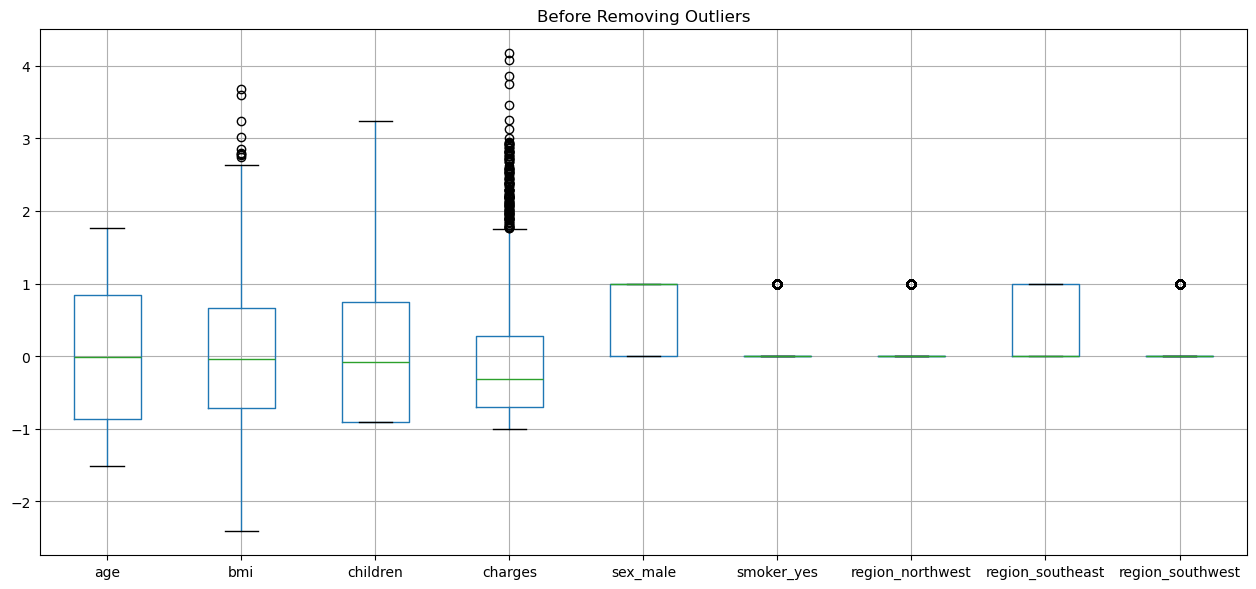

In [84]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
df.boxplot()
plt.title("Before Removing Outliers")
plt.tight_layout()
plt.show()

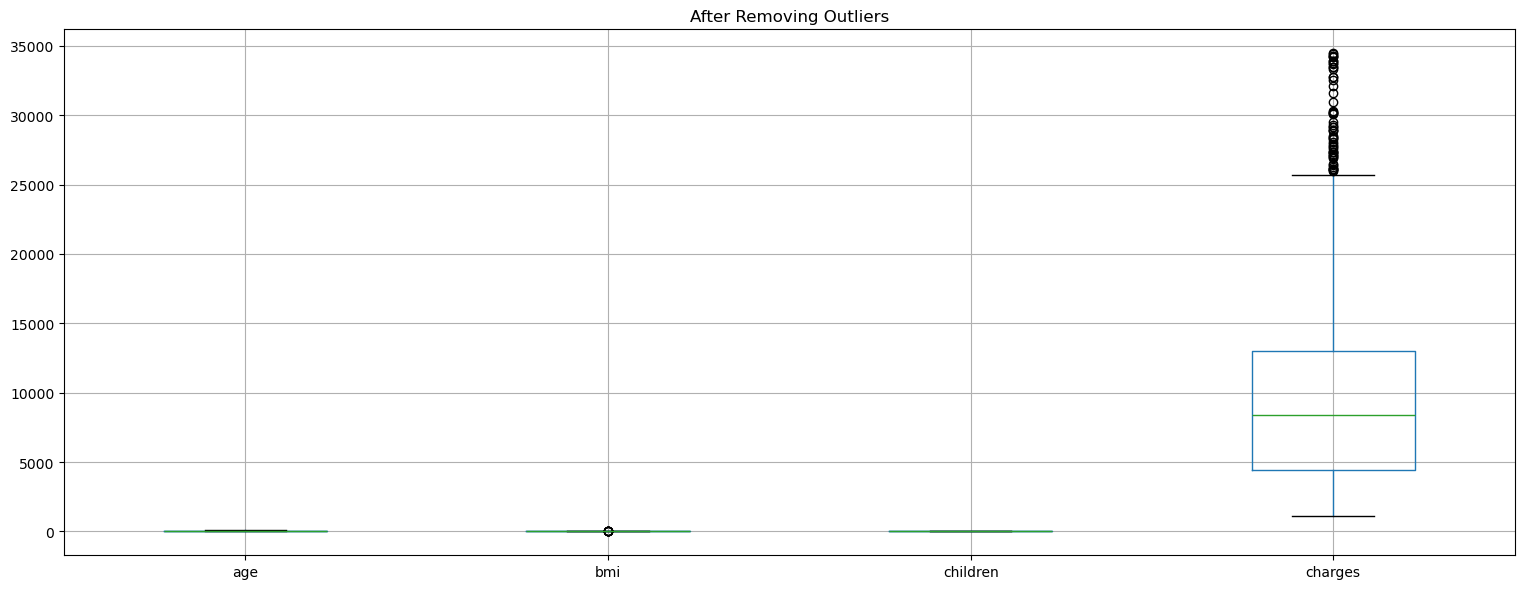

In [88]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
data_cleaned.boxplot()
plt.title("After Removing Outliers")
plt.tight_layout()
plt.show()

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns

## Impute numerical columns with mean

In [21]:
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

## Impute categorical columns with most frequent

In [23]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 5. Encode categorical variables

In [25]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 6. Feature Scaling

In [27]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 7. Split dataset into features (X) and target (y)

In [29]:
X = df.drop('charges', axis=1)  
y = df['charges']

# 8. Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9. Final check

In [33]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1070, 8)
Testing data shape: (268, 8)


# Building Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model and Training model

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Prediction

In [39]:
y_pred = model.predict(X_test)

# Model Evaluation Metrics

In [41]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.22926355667538661
R² Score: 0.7835929767120722


# Data Visualization Setup

In [43]:
import matplotlib.pyplot as plt

# Actual vs Predicted Plot

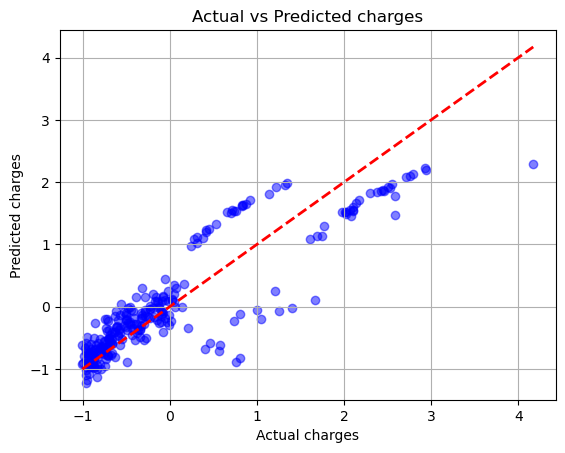

In [45]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.ylabel('Predicted charges')
plt.xlabel('Actual charges')
plt.title('Actual vs Predicted charges')
plt.grid(True)
plt.show()